In [22]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [23]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [24]:
# Dataset summary
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
# Assuming the target column is named 'PRICE' (adjust if different)
X = data.drop('medv', axis=1)
y = data['medv']

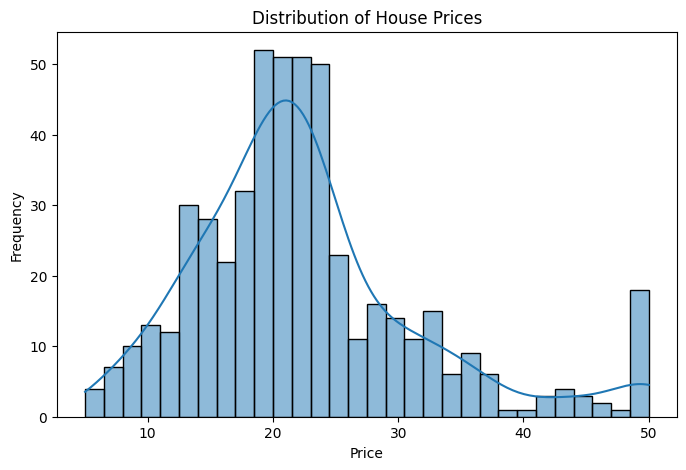

In [26]:
# Plotting distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<Axes: ylabel='medv'>

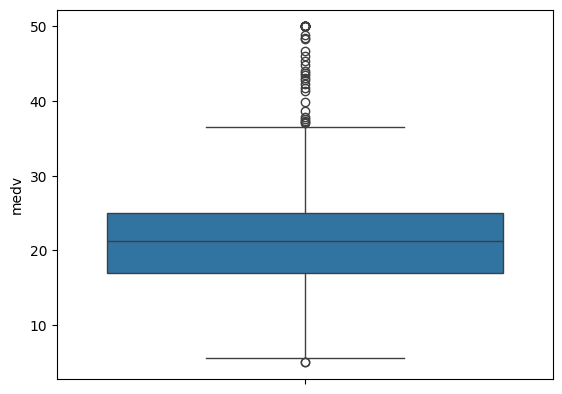

In [36]:
sns.boxplot(data.medv)

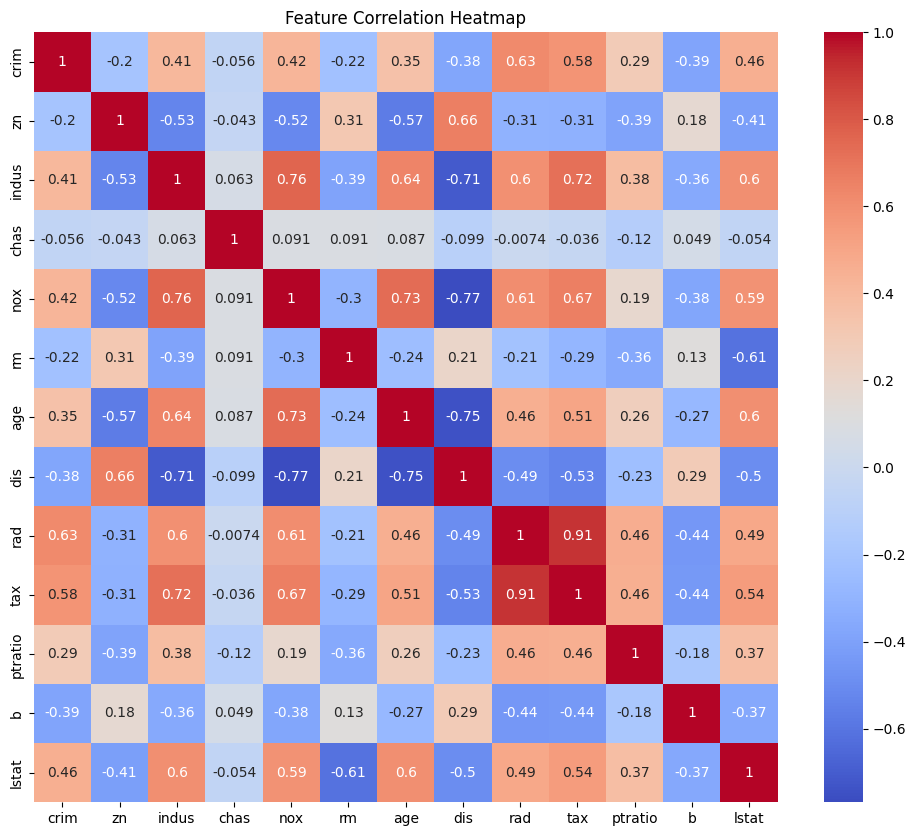

In [27]:
plt.figure(figsize=(12, 10))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [28]:
z_scores = (y - y.mean()) / y.std()
X = X[(z_scores > -3) & (z_scores < 3)]
y = y[(z_scores > -3) & (z_scores < 3)]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 609.4547 - mae: 22.9108 - val_loss: 494.3297 - val_mae: 20.7432
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 574.5624 - mae: 21.9777 - val_loss: 408.9501 - val_mae: 18.6417
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 415.1115 - mae: 18.3058 - val_loss: 245.1067 - val_mae: 13.7114
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 227.2005 - mae: 12.6622 - val_loss: 67.5916 - val_mae: 5.5892
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.2766 - mae: 7.2850 - val_loss: 65.1040 - val_mae: 5.3522
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48.8663 - mae: 5.3632 - val_loss: 62.1291 - val_mae: 4.7542
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 34.3858 - mae: 4.2520 - val_loss: 53.4747 - val_mae: 4.4931
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8754 - mae: 3.6283 - val_loss: 55.6367 - val_mae: 4.6702
Epoch 9/100
12/12 ━━━━━━━━━━━━━━

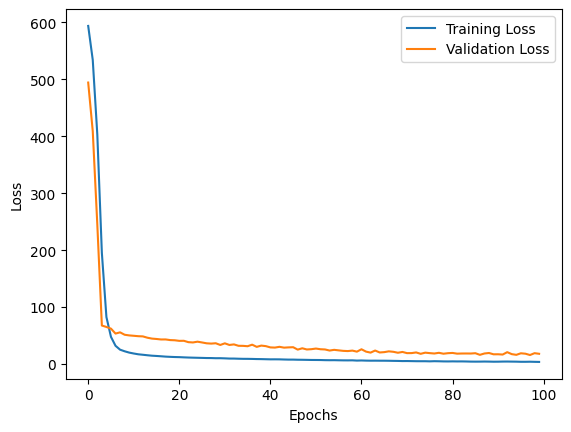

In [31]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 8.3592 - mae: 2.0149
Mean squared error on test data:  10.819562911987305
Mean absolute error on test data:  2.1448895931243896


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


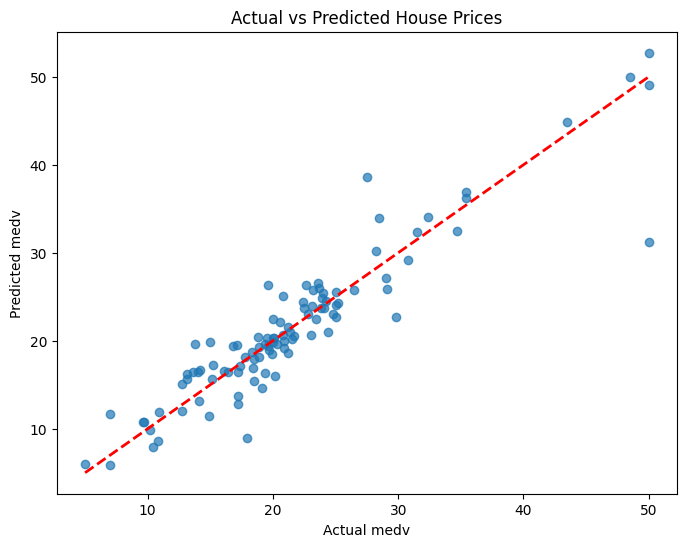

In [33]:
# Predict on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual medv')
plt.ylabel('Predicted medv')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [34]:
# --- Step 1: Prepare new data
new_input = {
    'crim': 0.1,
    'zn': 18.0,
    'indus': 2.31,
    'chas': 0,
    'nox': 0.538,
    'rm': 6.575,
    'age': 65.2,
    'dis': 4.09,
    'rad': 1,
    'tax': 296,
    'ptratio': 15.3,
    'b': 396.9,
    'lstat': 4.98
}

new_input_df = pd.DataFrame([new_input])

# --- Step 2: Scale
new_input_scaled = scaler.transform(new_input_df)

# --- Step 3: Predict
predicted_price = model.predict(new_input_scaled)
print(f"Predicted House Price (medv): {predicted_price.flatten()[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Predicted House Price (medv): 25.30


In [41]:
# Check if there are missing values
print("Missing values before filling:")
print(data.isnull().sum())

# Fill missing values with column-wise mean
data.fillna(data.mean(), inplace=True)

# Verify no missing values remain
print("\nMissing values after filling:")
print(data.isnull().sum())

Missing values before filling:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Missing values after filling:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
